<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-BaezCrdrm/blob/master/MCA_SistDist_Ex1_SBH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Distribuidos
## Primera evaluacion

Se evaluaran los siguientes puntos:

### Importar datos

1. Adquirir los datos.
> * El conjunto de datos con el que van a trabajar esta disponibles en [este enlace](https://archive.org/download/nycTaxiTripData2013/trip_data.7z) y consiste en 12 archivos de texto que tiene informacion del viajes de taxis en la ciudad de NY durante el 2013.
> * En la red interna de LANIA usando cable la descarga del archivo comprimido desde el enlace tomó entre 5 y 10 minutos. Tomen sus provisiones
> * El archivo comprimido tiene un tamaño de aproximadamente 4G, el tamaño de archivo mensual oscila entre 2.0 y 2.5G. La base de datos completa es de aproximadamente 30G.
2. Una vez descargado el archivo pueden descomprimirlo usando la siguiente instruccion
>` !7z x trip_data.7z -o/content/`
sin embargo si intentan descomprimir todos los archivos en su sesion se van a terminar el espacio de disco disponible. En esta practica solo van a trabajar con datos correspondientes a los primeros cuatro meses. 
3. Responder las siguientes preguntas:
   1. Cuantas columnas contiene cada archivo de datos descomprimido
   2. Cuantos renglones tiene cada archivo
4. Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:
    1. indicar claramente cuantos son los renglones con errores y a que archivos corresponden
    2. crear un nuevo conjunto de datos con los errores eliminados
5. Crear un `DataFrame` usando la libreria `pandas` y responder lo siguiente:
   1. Indicar el tiempo en segundos, que  tarda la libreria `pandas` en leer un archivo a un  `DataFrame`
   2. Cual es la huella de memoria del proceso usado para generar el objeto `DataFrame`
   2. Cuanta memoria del sistema se usa para crear el objeto anterior
   3. Indicar el tiempo que tarda `pandas` en obtener el promedio de la distancia de viaje (`trip_distance`)
6. Todos los pasos siguientes deben **realizarse** usando la libreria `dask`
   3. Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (`trip_distance`)
   3. Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (`trip_time_in_secs`)
   4. Con las columnas `pickup_datetime` y `dropoff_datetime` como objetos temporales, crear una nueva columna en los dataframes que se llame `duracion` y compararla renglon a renglon con la columna `trip_time_in_secs`
   5. Definir un `viaje_largo` como aquellos en los que la duracion del viaje (`trip_time_in_secs`) sea mayor a 20 minutos.
7. Contar el numero de viajes largos en cada archivo
8. De los viajes largos, identificar el numero de taxis diferentes (la columna `medallion` contiene un numeroque identificada a cada uno de los vehiculos). Que vehiculos son los que mas viajes realizan en cada mes? Son el mismo vehiculo?
9. Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?
10. Elegir el vehiculo con mas viajes en cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por
   * dia de la semana (un color distinto para cada dia)
   * hora del dia (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, etc.)
11. Repetir para las posiciones donde se bajan los pasajeros para el mismo vehiculo.


## 1. Adquisición de los datos


# Desarrollo y comprobación
Este segmento contiene toda la información realizada para responder las preguntas establecidas.

## En colaboración:
- Luis Daniel Hernandez Jimenez
- Alexis Martínez Arteaga
- Jose David Cobos Trujillo
- Lorrain Eugenio Giddings Soto
- Yoselin Araceli Campos Sacramento
- Ana Margarita Reyes Hernandez
- Joaquin Aguilar Hernandez
- Georgina Valenzuela Carrasco
- Horacio Tapia McClung

In [0]:
import psutil, os

La función `huella_memoria` fue obtenida de las libretas de cuadernos anteriores.

In [0]:
def huella_memoria():
    ''' Regresa la juella de memoria en MB usada por un proceso de Python'''
    mem = psutil.Process(os.getpid()).memory_info().rss
    return (mem / 1024**2)

## 1. Adquirir los datos

Agregar Google Drive para no tener que descargar los datos.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
cd gdrive/My\ Drive/'Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [0]:
if not os.path.exists('Evaluacion'):
    os.mkdir('Evaluacion')

In [6]:
ls

 Amazon1.ipynb                            SD_S2_L1.ipynb
 AprendizajeSupervisado.ipynb             SD_S2_L2.ipynb
'Copie de AprendizajeSupervisado.ipynb'   SD_S3_L1.ipynb
'Copy of SD_S2_L1.ipynb'                  SD_S4_L1.ipynb
 Evaluacion/                              SD_S5_L1.ipynb
 Examen1.1.ipynb                          SD_S6_L1.ipynb
 Examen_Matematicas.ipynb                 SD_S6_L2.ipynb
 Genetico2.ipynb                         'Steepest Ascent Hill-Climbing.ipynb'
 MCA_SistDist_Ex1_SBH.ipynb               TI2_1.ipynb
 Prueba1.ipynb                            Untitled
 Reinas1.ipynb                            Untitled0.ipynb
 SD2/                                     Untitled1.ipynb
 SD_S1_L1.ipynb                           Untitled2.ipynb


In [7]:
cd Evaluacion

/content/gdrive/My Drive/Colab Notebooks/Evaluacion


In [8]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/Evaluacion'

In [9]:
!wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z

--2019-06-18 23:27:20--  https://archive.org/download/nycTaxiTripData2013/trip_data.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z [following]
--2019-06-18 23:27:20--  https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z
Resolving ia802501.us.archive.org (ia802501.us.archive.org)... 207.241.228.191
Connecting to ia802501.us.archive.org (ia802501.us.archive.org)|207.241.228.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4102781969 (3.8G) [application/x-7z-compressed]
Saving to: ‘trip_data.7z.1’

trip_data.7z.1      100%[===================>]   3.82G  3.20MB/s    in 13m 17s 

2019-06-18 23:40:37 (4.91 MB/s) - ‘trip_data.7z.1’ saved [4102781969/4102781969]



## 2. Descomprime datos
Descomprime un sólo archivo de datos descargados.

In [10]:
!7z e trip_data.7z -o/content/gdrive/My\ Drive/Colab\ Notebooks/Evaluacion/Data trip_data_1.csv


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4102781969 bytes (3913 MiB)

Extracting archive: trip_data.7z
--
Path = trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

  0%      0% - trip_data_1.csv                        1% - trip_data_1.csv                        2% - trip_data_1.csv                        3% - trip_data_1.csv                        4% - trip_data_1.csv                        5% - trip_data_1.csv                      

In [0]:
import pandas as pd, time

In [12]:
cd Data

/content/gdrive/My Drive/Colab Notebooks/Evaluacion/Data


## 5. Crear un `DataFrame` usando la libreria `pandas`.

In [0]:
# Tiempo y memoria
t_start = time.time()
mem_antes = huella_memoria()

df = pd.read_csv('trip_data_1.csv')

# Tiempo y memoria
mem_despues = huella_memoria()
t_end = time.time()

## 3. Preguntas

Contar dimensiones del dataframe.

Hay `14776615` registros y `14` variables/columnas.

In [14]:
df.shape

(14776615, 14)

## 4. Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:

In [15]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


### 0. Verificar errores
Crear un nuevo conjunto de datos con los errores eliminados.

Verificar errores en el Dataframe y limpiar los errores nulos y NaN que pudieran afectar al DataFrame.

#### Limpiar data frame

In [16]:
df.isna().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [0]:
df = df.dropna(how='all', subset=['dropoff_longitude', 'dropoff_latitude'])

#### Eliminar columnas

In [0]:
df = df.drop('store_and_fwd_flag', axis=1)

In [19]:
df.isna().sum()

medallion            0
hack_license         0
vendor_id            0
rate_code            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

**Al limpiar el resultado** es igual a:

14776529 registros y 13 columnas/variables.

In [20]:
df.shape

(14776529, 13)

### 5.1 Indicar el tiempo en segundos, que  tarda la libreria `pandas` en leer un archivo a un  `DataFrame.

In [21]:
print('Tiemo de lectura: {} s'.format(t_end - t_start))

Tiemo de lectura: 102.31801748275757 s


### 5.2 Cual es la huella de memoria del proceso usado para generar el objeto `DataFrame.

In [22]:
print('Huella de memoria: {} MB'.format(mem_despues - mem_antes))

Huella de memoria: 4962.84765625 MB


### 5.3 Cuanta memoria del sistema se usa para crear el objeto anterior.

In [23]:
print('Memoria del sistema: {} MB'.format(huella_memoria()))

Memoria del sistema: 6348.74609375 MB


### 5.4 Indicar el tiempo que tarda `pandas` en obtener el promedio de la distancia de viaje (`trip_distance`).

_En colaboración con **Alexis Martínez**_

In [0]:
# Tiempo y memoria
t_start = time.time()
mem_antes = huella_memoria()

no_ceros = (df['trip_distance'] != 0)
promedio_total_distancia_viaje = no_ceros.mean()

# Tiempo y memoria
mem_despues = huella_memoria()
t_end = time.time()

In [25]:
print('Tiemo de lectura: {} s'.format(t_end - t_start))
# print('Uso de memoria: {} MB'.format(mem_despues - mem_antes))

Tiemo de lectura: 0.0654911994934082 s


# Previo
Instrucciones contruidas sobre el archivo previo a edición propia.

In [0]:
cuantosTaxis=df['medallion'].value_counts()
cuantosTaxis[0]

2137

In [0]:
# selecciona
este="7E1346F23960CC18D7D129FA28B63A75"
# taxi

In [0]:
estos=df[df.medallion==este]

In [0]:
estos.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'hour', 'weekday'],
      dtype='object')

In [0]:
# convert dropoff times to datetimes
# estos['dropoff_datetime'] = pd.to_datetime(estos['dropoff_datetime'])
estos['hour'] = estos['dropoff_datetime'].dt.hour
estos['weekday'] = estos['dropoff_datetime'].dt.weekday

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
estePorHora = estos.groupby('hour')

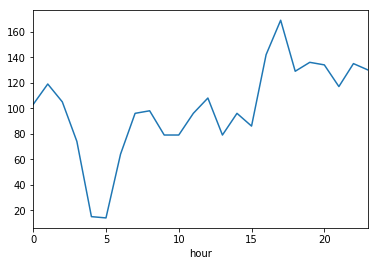

In [0]:

estePorHora['passenger_count'].sum().plot.line()

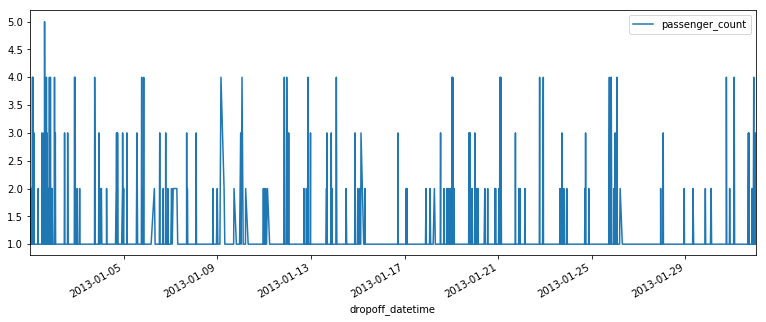

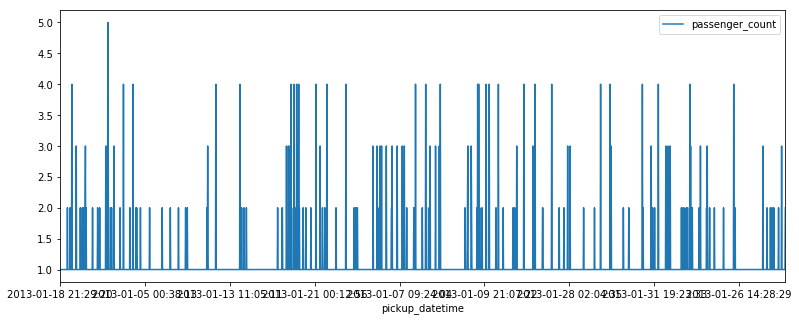

In [0]:
estos.plot.line(x='dropoff_datetime', y='passenger_count', figsize=(13,5))
estos.plot.line(x='pickup_datetime', y='passenger_count', figsize=(13,5))